In [1]:
#Import libraries for exploratory data analysis & data visualisation

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load training data from csv file and adding column names, based on adult.names file. Target class label is named as 'income-class'

df=pd.read_csv('adult.data.csv', header=None, names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income-class'])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#Check data characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income-class    32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#Statistical summary

df.describe(include="all")

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
#Separate categorical and numerical features
group_cat= df.dtypes[df.dtypes == 'object']
group_num = df.dtypes[df.dtypes != 'object']

#Check out distribution of categorical features
for i in list(group_cat.index):
    print(f'{i.title()}')
    total = df[i].value_counts()
    percent = round(df[i].value_counts()/df.shape[0]*100,2)
    summary = pd.concat([total,percent],keys = ['total','percent'],axis=1)
    print(summary)
    print('\n')
  

Workclass
                   total  percent
 Private           22696    69.70
 Self-emp-not-inc   2541     7.80
 Local-gov          2093     6.43
 ?                  1836     5.64
 State-gov          1298     3.99
 Self-emp-inc       1116     3.43
 Federal-gov         960     2.95
 Without-pay          14     0.04
 Never-worked          7     0.02


Education
               total  percent
 HS-grad       10501    32.25
 Some-college   7291    22.39
 Bachelors      5355    16.45
 Masters        1723     5.29
 Assoc-voc      1382     4.24
 11th           1175     3.61
 Assoc-acdm     1067     3.28
 10th            933     2.87
 7th-8th         646     1.98
 Prof-school     576     1.77
 9th             514     1.58
 12th            433     1.33
 Doctorate       413     1.27
 5th-6th         333     1.02
 1st-4th         168     0.52
 Preschool        51     0.16


Marital-Status
                        total  percent
 Married-civ-spouse     14976    45.99
 Never-married          10683    

# Missing Values

Unknown values denoted by ' ?' were present in 3 features (‘workclass’, ‘occupation’, and ‘native-country’). As these comprised up to only less than 6% of values per feature, we will impute them with the most frequently occurring values instead of removing them, to retain as much data as possible.

In [6]:
df['workclass'].replace(to_replace=' ?',value=' Private',inplace = True)
df['occupation'].replace(to_replace=' ?',value=' Prof-specialty',inplace = True)
df['native-country'].replace(to_replace=' ?',value=' United-States',inplace = True)

df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,24532,NaN,10501,NaN,14976,5983,13193,27816,21790,NaN,NaN,NaN,29753,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


Number of unique values dropped by 1 in 'workclass', 'occupation', and 'native-country.

# Class imbalance

<Axes: xlabel='income-class', ylabel='Count'>

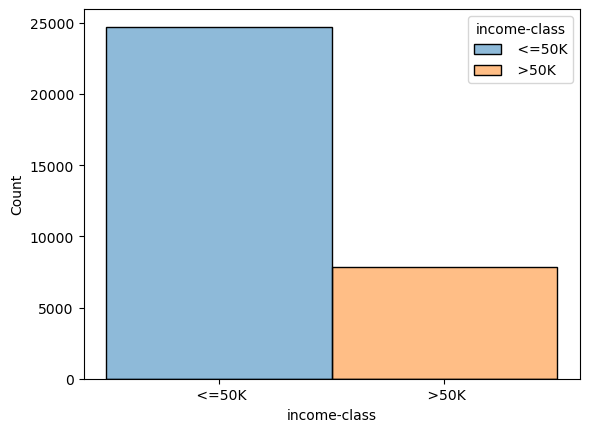

In [7]:
sns.histplot(data=df, x='income-class', hue='income-class')

In [8]:
round((df['income-class'].value_counts() / df.shape[0])
      * 100, 2).astype(str) + ' %'

 <=50K    75.92 %
 >50K     24.08 %
Name: income-class, dtype: object

The data is only mildly imbalanced in terms of target class label. This distribution seems reflective of real-world income distribution, so I did not apply techniques to correct for imbalance. Moreover, imbalance issues are usually more pertinent to treat when predicting the minority class, whereas I am interested in the majority class.

# Data Visualisation

Text(0, 0.5, 'Proportion')

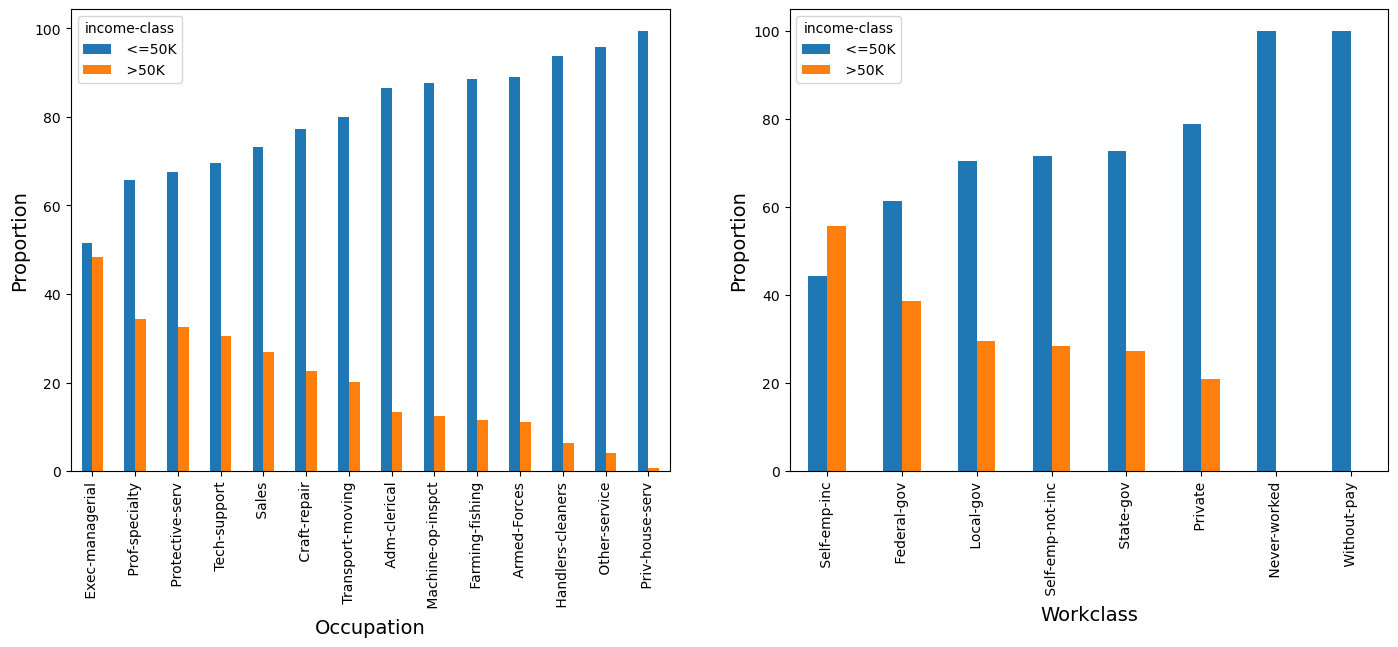

In [9]:
#Check how income-class varies with categorical features
occupationincome = pd.crosstab(df['occupation'], df['income-class'])
workclassincome = pd.crosstab(df['workclass'], df['income-class'])
educationincome = pd.crosstab(df['education'], df['income-class'])
maritalincome = pd.crosstab(df['marital-status'], df['income-class'])
relationshipincome = pd.crosstab(df['relationship'], df['income-class'])
raceincome = pd.crosstab(df['race'], df['income-class'])
sexincome = pd.crosstab(df['sex'], df['income-class'])
nativecountryincome = pd.crosstab(df['native-country'], df['income-class'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(occupationincome.div(occupationincome.sum(axis=1),axis=0)*100).sort_values(by=' <=50K').plot(kind='bar',ax=ax)
plt.xlabel('Occupation',fontsize=14)
plt.ylabel('Proportion',fontsize=14)

ax = fig.add_subplot(1,2,2)
(workclassincome.div(workclassincome.sum(axis=1),axis=0)*100).sort_values(by=' <=50K').plot(kind='bar',ax=ax)
plt.xlabel("Workclass",fontsize=14)
plt.ylabel('Proportion', fontsize=14)


Text(0, 0.5, 'Proportion')

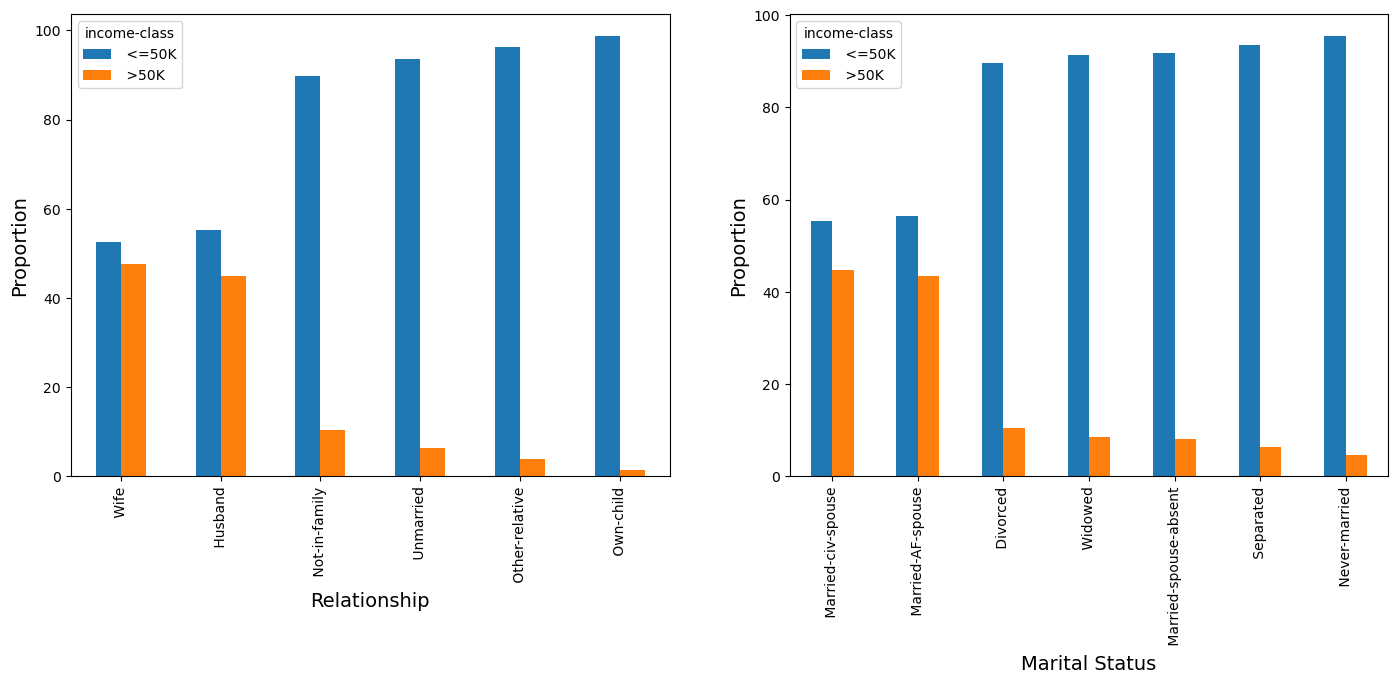

In [10]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(relationshipincome.div(relationshipincome.sum(axis=1),axis=0)*100).sort_values(by=' <=50K').plot(kind='bar',ax=ax)
plt.xlabel('Relationship',fontsize=14)
plt.ylabel('Proportion',fontsize=14)

ax = fig.add_subplot(1,2,2)
(maritalincome.div(maritalincome.sum(axis=1),axis=0)*100).sort_values(by=' <=50K').plot(kind='bar',ax=ax)
plt.xlabel("Marital Status",fontsize=14)
plt.ylabel('Proportion', fontsize=14)

Text(0, 0.5, 'Proportion')

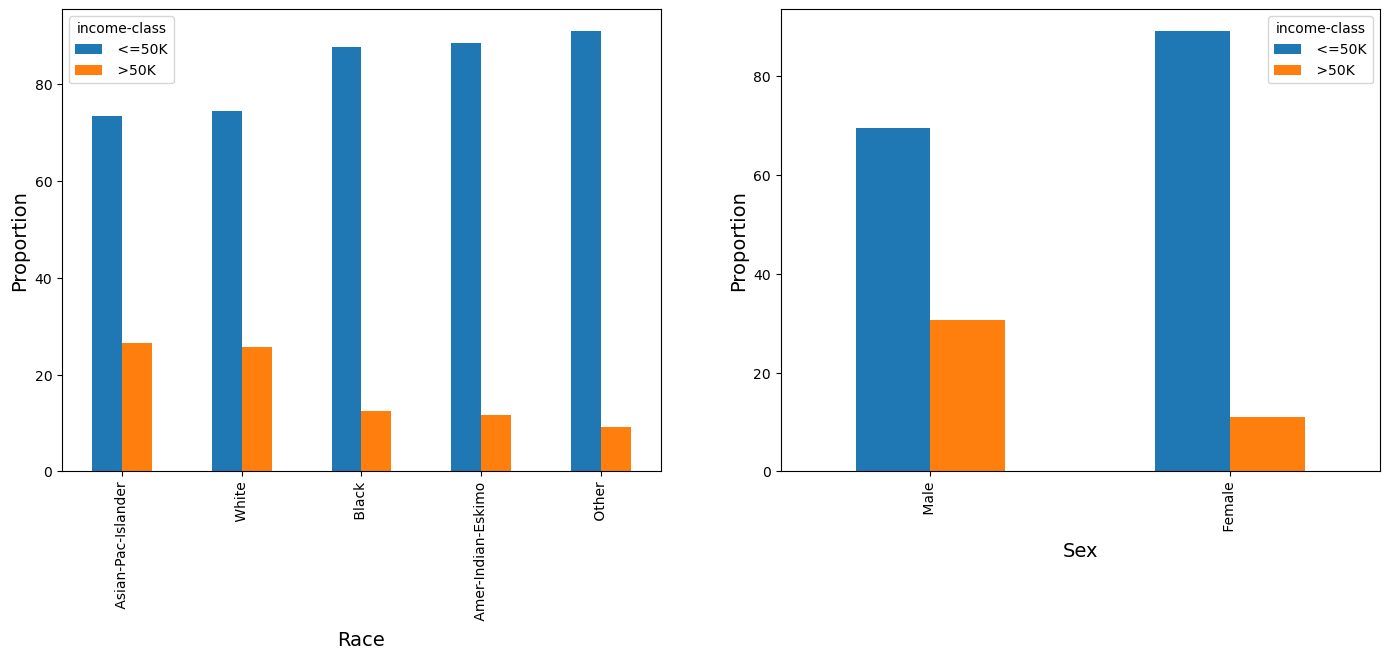

In [11]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(raceincome.div(raceincome.sum(axis=1),axis=0)*100).sort_values(by=' <=50K').plot(kind='bar',ax=ax)
plt.xlabel('Race',fontsize=14)
plt.ylabel('Proportion',fontsize=14)

ax = fig.add_subplot(1,2,2)
(sexincome.div(sexincome.sum(axis=1),axis=0)*100).sort_values(by=' <=50K').plot(kind='bar',ax=ax)
plt.xlabel("Sex",fontsize=14)
plt.ylabel('Proportion', fontsize=14)

Text(0, 0.5, 'Proportion')

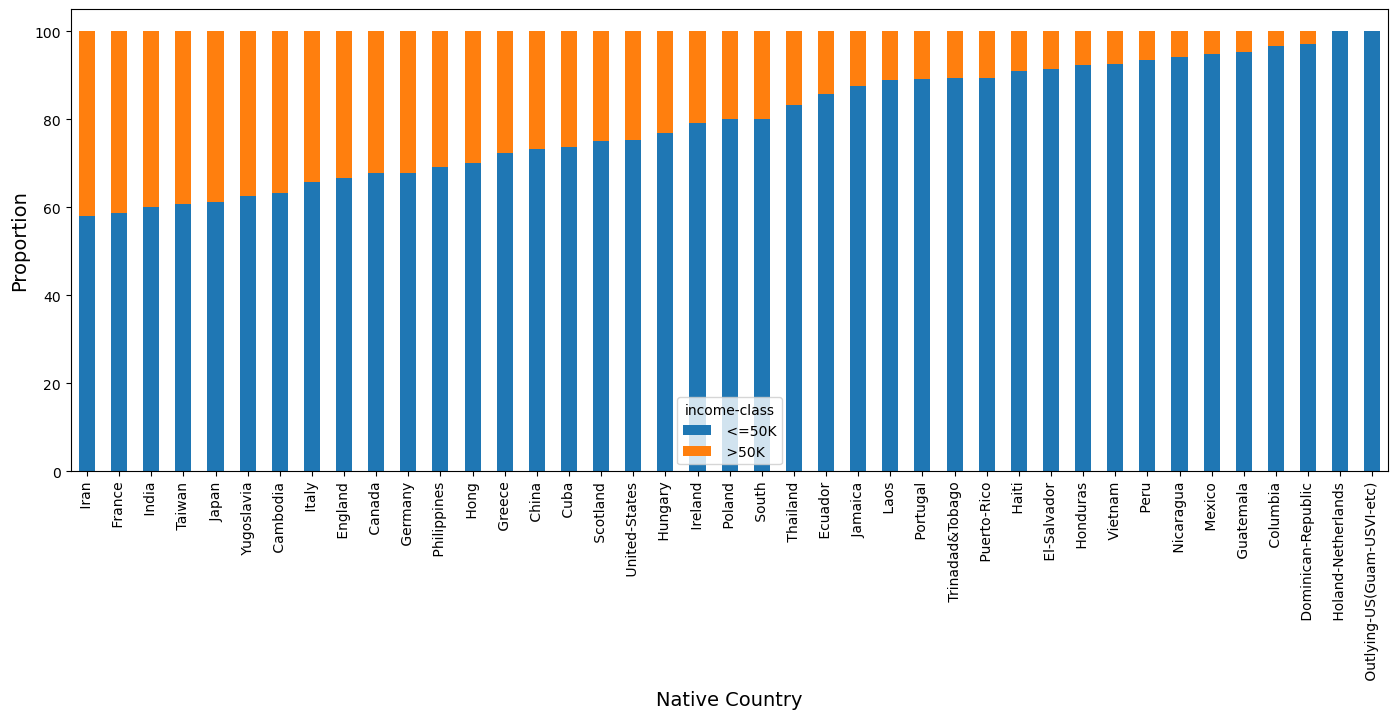

In [12]:
(nativecountryincome.div(nativecountryincome.sum(axis=1),axis=0)*100).sort_values(by=' <=50K').plot(kind='bar',stacked=True,figsize = (17,6))
plt.xlabel('Native Country',fontsize = 14)
plt.ylabel('Proportion',fontsize = 14)


Text(0, 0.5, 'Proportion')

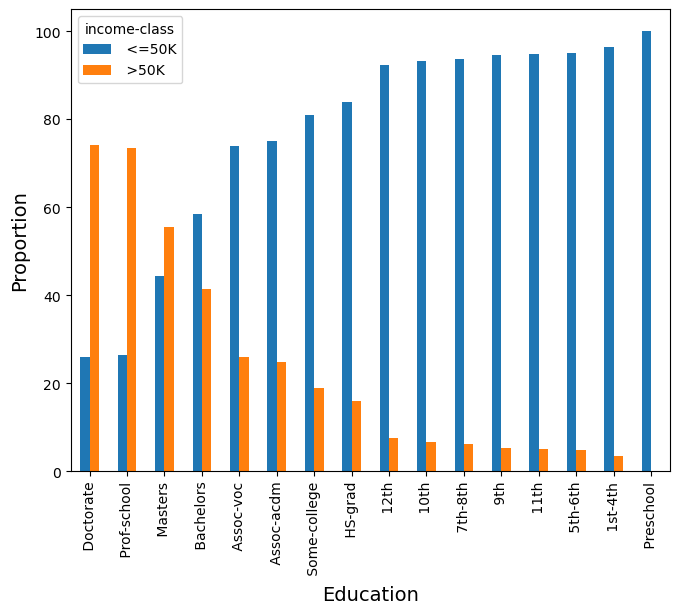

In [13]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(educationincome.div(educationincome.sum(axis=1),axis=0)*100).sort_values(by=' <=50K').plot(kind='bar',ax=ax)
plt.xlabel('Education',fontsize=14)
plt.ylabel('Proportion',fontsize=14)


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

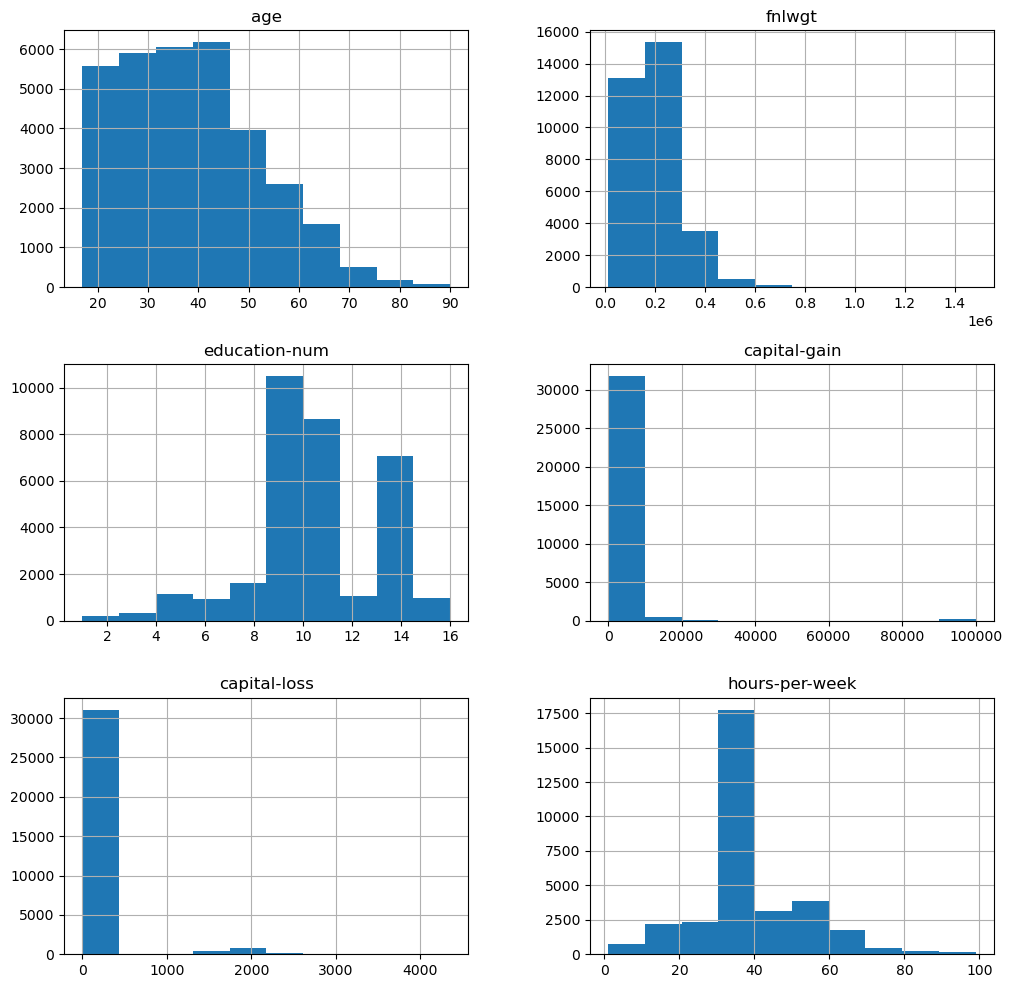

In [14]:
df[list(group_num.index)].hist(figsize = (12,12))

There are large differences in the scales of the numerical features e.g. age vs capital-gain. Normalisation may be required.

The data is skewed for several features e.g. 90% have ‘native-country’ as United States, 85% are of white race, 70% work in private sector, and 67% are male. The classifiers we choose should be able to handle such skews.

In [15]:
#Check correlation of numerical features with income-class

df['income-class']=df['income-class'].replace(' <=50K', 0)
df['income-class']=df['income-class'].replace(' >50K', 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income-class    32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


<Axes: >

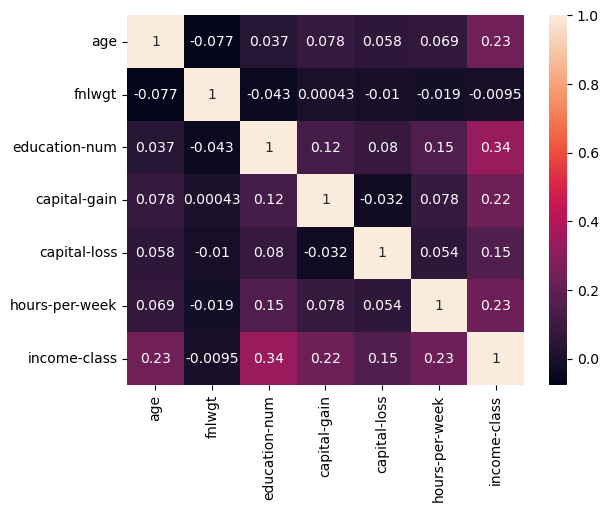

In [16]:
sns.heatmap(df.corr(), annot=True)

We can drop ‘fnlwgt’ feature due to its weak correlation with target class label.

In [17]:
#Drop fnlwgt variable from analysis due to weak correlation with target label.

df.drop(['fnlwgt'], axis=1, inplace=True)
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [18]:
print(df['education'].value_counts()) 
print('\n')
print(df['education-num'].value_counts())

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64


'education' and 'education-num' contain the same information - one of them is redundant feature and can be dropped.

In [19]:
#Drop 'education-num' feature as it is redundant.

df.drop(['education-num'], axis=1, inplace=True)
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


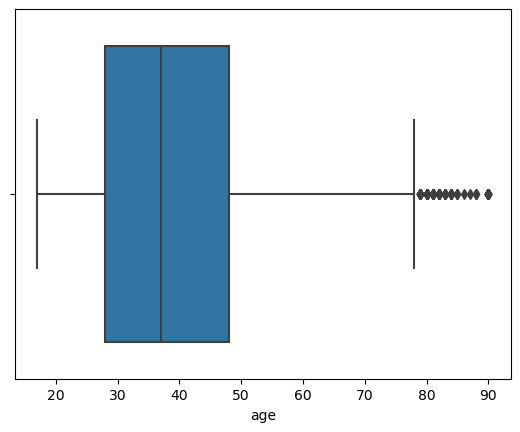

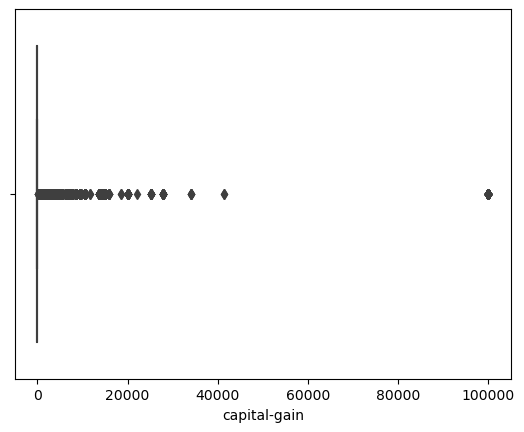

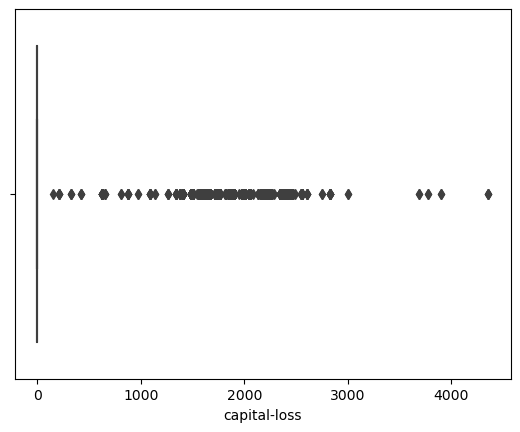

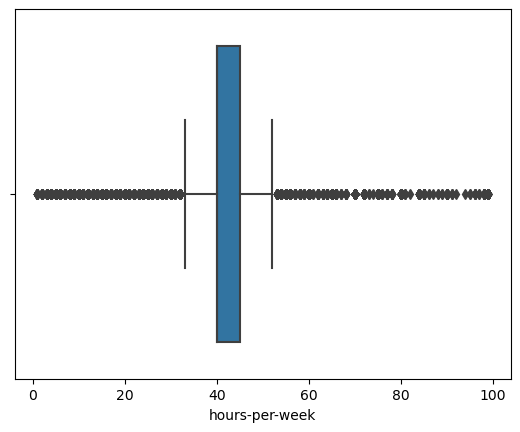

In [20]:
#Check for outliers in numerical features.

num_cat=['age', 'capital-gain','capital-loss','hours-per-week']
for i in num_cat:
  sns.boxplot(x = df[i])
  plt.show()


There seems to be an outliers for 'capital-gain' - need to explore records with these extreme values to determine if they need to be removed.

In [21]:
df['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64

In [22]:
#Look at records that are not zero for 'capital-gain'
temp=df.loc[df['capital-gain'] != 0]
temp.describe(include='all')

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
count,2712.000000,2712,2712,2712,2712,2712,2712,2712,2712.000000,2712.0,2712.000000,2712,2712.000000
unique,NaN,7,16,7,13,6,5,2,NaN,NaN,NaN,34,NaN
top,NaN,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,1855,683,1819,679,1598,2409,2089,NaN,NaN,NaN,2525,NaN
mean,44.016224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12938.541298,0.0,43.510324,NaN,0.618363
std,13.268269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22395.413530,0.0,12.207654,NaN,0.485878
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.000000,0.0,1.000000,NaN,0.000000
25%,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3411.000000,0.0,40.000000,NaN,0.000000
50%,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7298.000000,0.0,40.000000,NaN,1.000000
75%,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14084.000000,0.0,50.000000,NaN,1.000000


Extreme value of ‘99999’ for ‘capital-gain’ indicate outliers given that the 75th percentile value was only ‘14084’ even after excluding zero values. 

<Axes: >

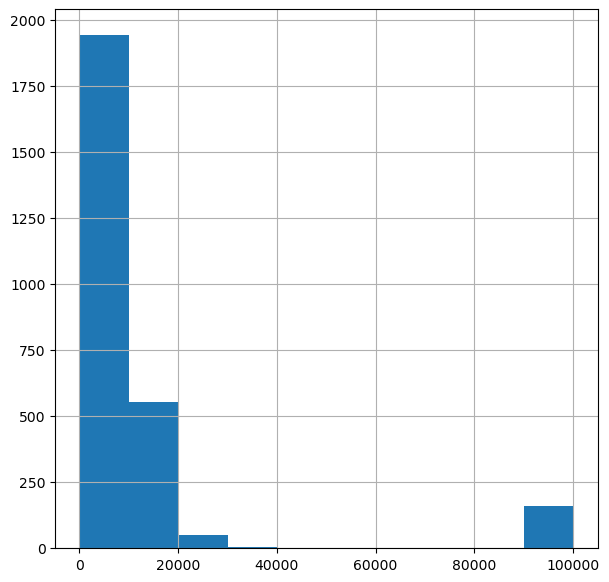

In [23]:
temp['capital-gain'].hist(figsize=(7,7))

In [24]:
#From the graph, it seems like there are no values between 40,000 and the max value of 99,999. Check to confirm.
temp.loc[temp['capital-gain'] > 40000]['capital-gain'].value_counts()

99999    159
41310      2
Name: capital-gain, dtype: int64

In [25]:
#Look at the 159 records with 'capital-gain' = 99999
extreme=temp.loc[temp['capital-gain'] == 99999]
extreme.describe(include='all')

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
count,159.000000,159,159,159,159,159,159,159,159.0,159.0,159.000000,159,159.0
unique,NaN,6,10,6,11,5,4,2,NaN,NaN,NaN,9,NaN
top,NaN,Private,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,86,46,132,71,121,140,137,NaN,NaN,NaN,149,NaN
mean,46.358491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99999.0,0.0,49.798742,NaN,1.0
std,10.899009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,12.450804,NaN,0.0
min,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99999.0,0.0,20.000000,NaN,1.0
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99999.0,0.0,40.000000,NaN,1.0
50%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99999.0,0.0,50.000000,NaN,1.0
75%,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99999.0,0.0,60.000000,NaN,1.0


These records all have the target class label of ‘ >$50K’. Hence, I will keep these records so as not to drop any minority class data which could worsen the class imbalance.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>],
       [<Axes: title={'center': 'income-class'}>, <Axes: >]], dtype=object)

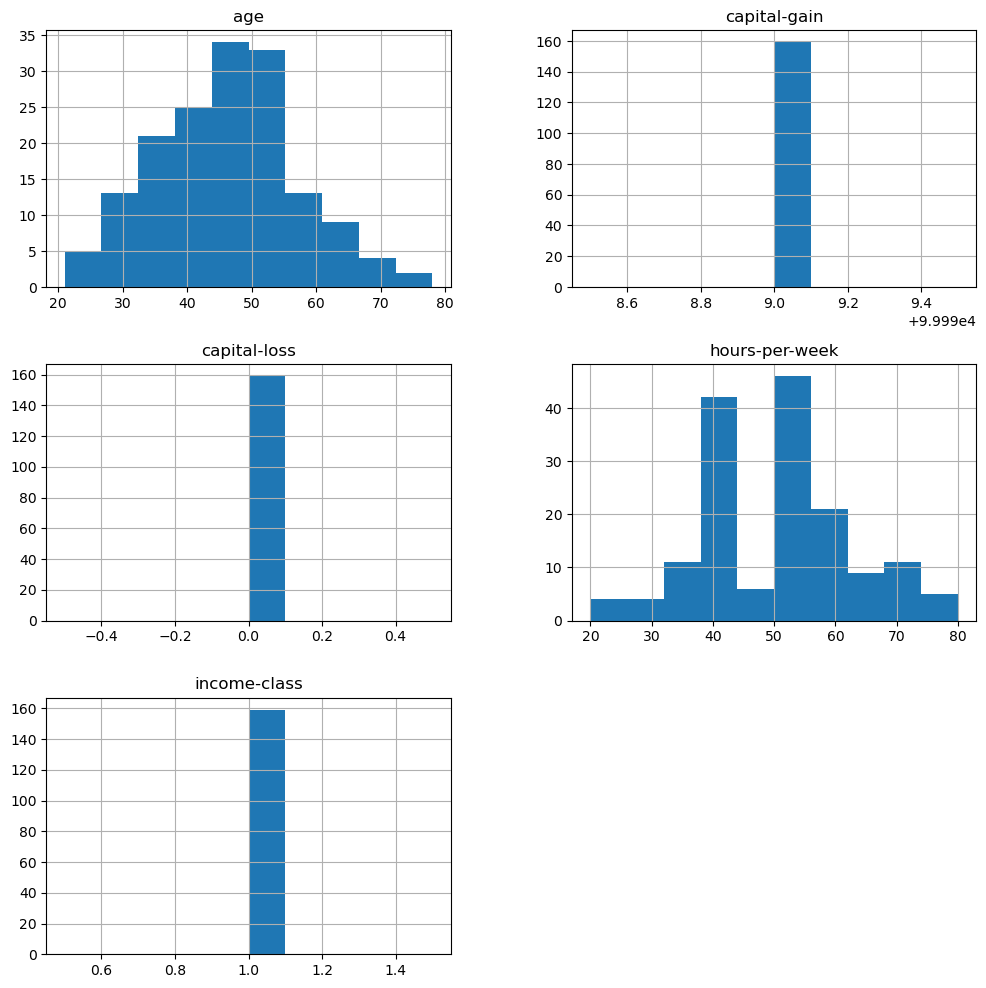

In [26]:
extreme.hist(figsize=(12,12))

People with 99999 capital gains are quite evenly distributed in terms of age and hours-per-week. They seem to all have 0 capital loss and earn above $50K. 

In [27]:
extreme['capital-loss'].unique()

array([0], dtype=int64)

In [28]:
extreme['income-class'].unique()

array([1], dtype=int64)

In [29]:
#Check if inverse is true - those with capital loss would have zero capital gain.
temp2=df.loc[df['capital-loss'] != 0]
temp2['capital-gain'].unique()

array([0], dtype=int64)

'capital-gain' and 'capital-loss' can be combined to create new feature 'gain-loss'.

In [30]:
df.insert(8,'gain-loss',df['capital-gain']-df['capital-loss'])
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,gain-loss,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,0,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,0,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,0,40,Cuba,0


In [31]:
df.drop('capital-gain', axis=1, inplace=True)
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,gain-loss,capital-loss,hours-per-week,native-country,income-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [32]:
df.drop('capital-loss', axis=1, inplace=True)
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,gain-loss,hours-per-week,native-country,income-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,0


In [33]:
#Combine similar infrequent categories.

gov = [' State-gov', ' Federal-gov', ' Local-gov']
nopay = [' Never-worked', ' Without-pay']
selfemp = [' Self-emp-inc', ' Self-emp-not-inc']

df['workclass'].replace(to_replace = gov ,value = ' Government',inplace = True)
df['workclass'].replace(to_replace = nopay ,value = ' Others',inplace = True)
df['workclass'].replace(to_replace = selfemp ,value = ' Self-Employed',inplace = True)
df['workclass'].value_counts()

 Private          24532
 Government        4351
 Self-Employed     3657
 Others              21
Name: workclass, dtype: int64

In [34]:
hasspouse = [' Married-civ-spouse', ' Married-AF-spouse']
nospouse = [' Widowed', ' Divorced', ' Separated', ' Married-spouse-absent', ' Never-married']

df['marital-status'].replace(to_replace = hasspouse ,value = ' Has-spouse',inplace = True)
df['marital-status'].replace(to_replace = nospouse ,value = ' No-spouse',inplace = True)
df['marital-status'].value_counts()

 No-spouse     17562
 Has-spouse    14999
Name: marital-status, dtype: int64

In [35]:
below = [' Preschool',' 1st-4th', ' 5th-6th', ' 7th-8th',' 9th', ' 10th', ' 11th', ' 12th']
assoc = [' Assoc-acdm', ' Assoc-voc']
postgrad = [' Masters', ' Prof-school', ' Doctorate']

df['education'].replace(to_replace = below ,value = ' Below-HS',inplace = True)
df['education'].replace(to_replace = assoc ,value = ' Assoc',inplace = True)
df['education'].replace(to_replace = postgrad ,value = ' Post-grad',inplace = True)
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Below-HS         4253
 Post-grad        2712
 Assoc            2449
Name: education, dtype: int64

In [36]:
others = [' Cambodia',' England',' Puerto-Rico',' Canada',' Germany',' India',' Japan',' Greece',' South',' China',' Cuba',' Iran',' Honduras',' Philippines',' Italy',' Poland',' Jamaica',' Vietnam',' Mexico',' Portugal',' Ireland',' France',' Dominican-Republic',' Laos',' Ecuador',' Taiwan',' Haiti',' Columbia',' Hungary',' Guatemala',' Nicaragua',' Scotland',' Thailand',' Yugoslavia',' El-Salvador',' Trinadad&Tobago',' Peru',' Hong',' Holand-Netherlands']
US = [' United-States', ' Outlying-US(Guam-USVI-etc)']

df['native-country'].replace(to_replace = others ,value = ' Others',inplace = True)
df['native-country'].replace(to_replace = US ,value = ' United-States',inplace = True)
df['native-country'].value_counts()

 United-States    29767
 Others            2794
Name: native-country, dtype: int64

In [37]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,gain-loss,hours-per-week,native-country,income-class
0,39,Government,Bachelors,No-spouse,Adm-clerical,Not-in-family,White,Male,2174,40,United-States,0
1,50,Self-Employed,Bachelors,Has-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,0
2,38,Private,HS-grad,No-spouse,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,0
3,53,Private,Below-HS,Has-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,0
4,28,Private,Bachelors,Has-spouse,Prof-specialty,Wife,Black,Female,0,40,Others,0


In [38]:
#Drop 'relationship' feature as it seems redundant with both 'marital-status' and 'sex'

df.drop('relationship', axis=1, inplace=True)
df.head()

,age,workclass,education,marital-status,occupation,race,sex,gain-loss,hours-per-week,native-country,income-class
0,39,Government,Bachelors,No-spouse,Adm-clerical,White,Male,2174,40,United-States,0
1,50,Self-Employed,Bachelors,Has-spouse,Exec-managerial,White,Male,0,13,United-States,0
2,38,Private,HS-grad,No-spouse,Handlers-cleaners,White,Male,0,40,United-States,0
3,53,Private,Below-HS,Has-spouse,Handlers-cleaners,Black,Male,0,40,United-States,0
4,28,Private,Bachelors,Has-spouse,Prof-specialty,Black,Female,0,40,Others,0


In [39]:
#Check how the reduced categories for the 4 features vary with income-class.

Text(0, 0.5, 'Proportion')

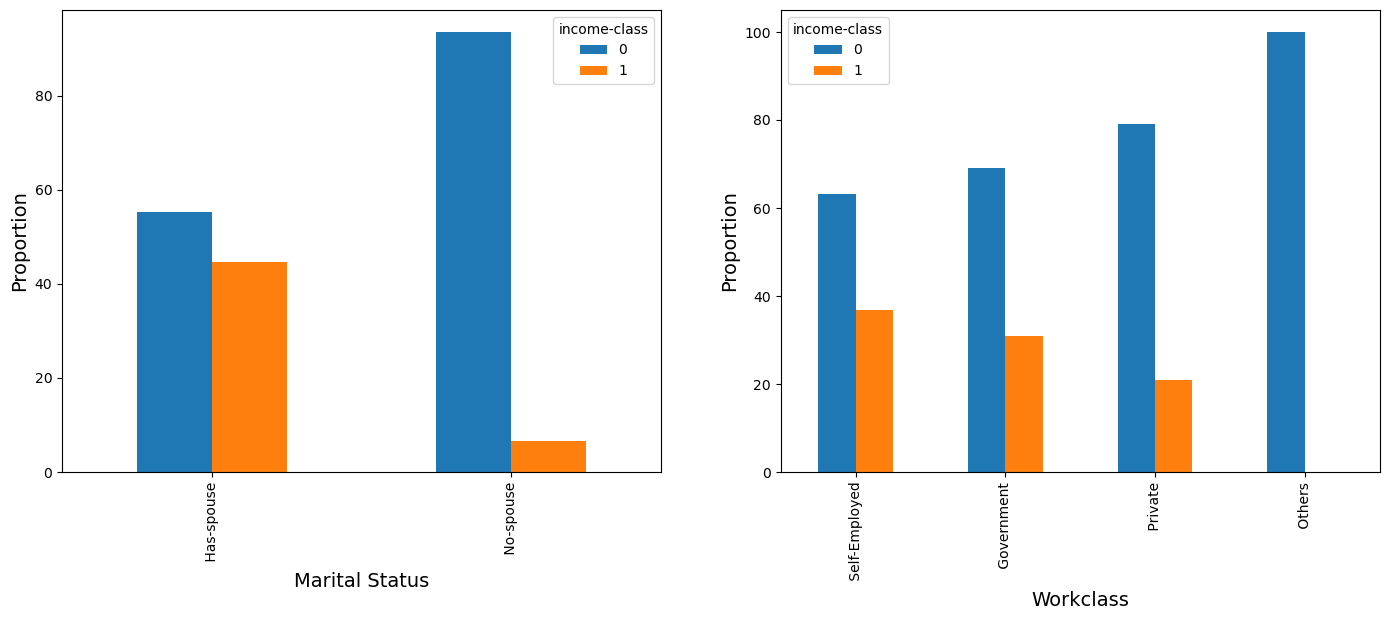

In [40]:
maritalincome = pd.crosstab(df['marital-status'], df['income-class'])
workclassincome = pd.crosstab(df['workclass'], df['income-class'])
educationincome = pd.crosstab(df['education'], df['income-class'])
nativecountryincome = pd.crosstab(df['native-country'], df['income-class'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(maritalincome.div(maritalincome.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',ax=ax)
plt.xlabel('Marital Status',fontsize=14)
plt.ylabel('Proportion', fontsize=14)

ax = fig.add_subplot(1,2,2)
(workclassincome.div(workclassincome.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',ax=ax)
plt.xlabel('Workclass',fontsize=14)
plt.ylabel('Proportion', fontsize=14)

Higher proportion of those without spouse earn below 50K. Higher proportion of self-employed earn above 50K.

Text(0, 0.5, 'Proportion')

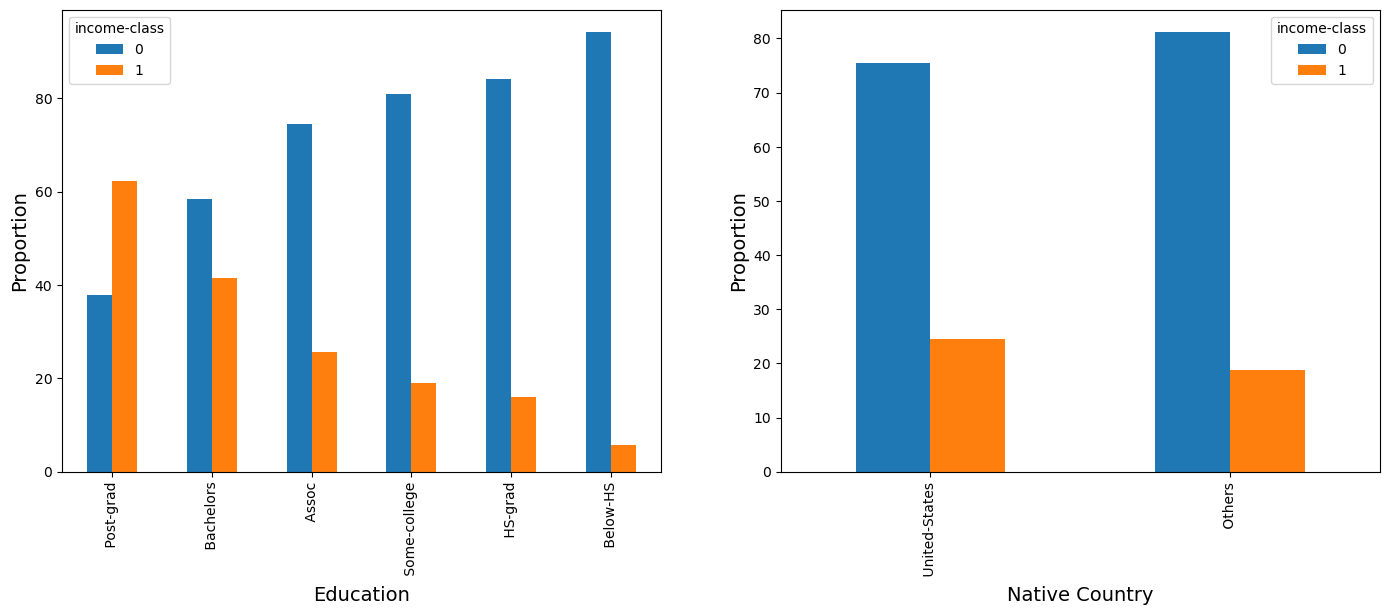

In [41]:
fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(educationincome.div(educationincome.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',ax=ax)
plt.xlabel("Education",fontsize=14)
plt.ylabel('Proportion', fontsize=14)

ax = fig.add_subplot(1,2,2)
(nativecountryincome.div(nativecountryincome.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',ax=ax)
plt.xlabel("Native Country",fontsize=14)
plt.ylabel('Proportion', fontsize=14)

From Masters onwards (i.e. post-grad category), the proportion of those earning below 50K exceeds that of those earning above 50K.

In [42]:
#Encoding, normalisation
#Train-test split or cross-val for model training
#Train Random Forest and Adaboost?
#Process data for test set
#Evaluate not based on accuracy, balanced accuracy? or other metrics.
#Hyperparameters tuning

In [43]:
x=df.drop(['income-class'], axis=1)
y=df['income-class']

In [44]:
#Encoding of categorical features - use OrdinalEncoder for 'education' to preserve order information

from sklearn.preprocessing import OrdinalEncoder

education_order =[[' Below-HS', ' HS-grad', ' Some-college', ' Assoc', ' Bachelors', ' Post-grad']]
education_encoder = OrdinalEncoder(categories=education_order)
x['education']=education_encoder.fit_transform(x[['education']])
x.head()

,age,workclass,education,marital-status,occupation,race,sex,gain-loss,hours-per-week,native-country
0,39,Government,4.0,No-spouse,Adm-clerical,White,Male,2174,40,United-States
1,50,Self-Employed,4.0,Has-spouse,Exec-managerial,White,Male,0,13,United-States
2,38,Private,1.0,No-spouse,Handlers-cleaners,White,Male,0,40,United-States
3,53,Private,0.0,Has-spouse,Handlers-cleaners,Black,Male,0,40,United-States
4,28,Private,4.0,Has-spouse,Prof-specialty,Black,Female,0,40,Others


In [45]:
#Use One-hot Encoder for 'workclass', 'occupation, and 'race' as these contain unordered nominal values

from sklearn.preprocessing import OneHotEncoder

workclass_encoder = OneHotEncoder()
workclass_enc = workclass_encoder.fit_transform(x[['workclass']])
workclass_x = pd.DataFrame(workclass_enc.toarray(), columns=workclass_encoder.get_feature_names_out(['workclass']))
x=pd.concat([x, workclass_x], axis=1)
x.head()


,age,workclass,education,marital-status,occupation,race,sex,gain-loss,hours-per-week,native-country,workclass_ Government,workclass_ Others,workclass_ Private,workclass_ Self-Employed
0,39,Government,4.0,No-spouse,Adm-clerical,White,Male,2174,40,United-States,1.0,0.0,0.0,0.0
1,50,Self-Employed,4.0,Has-spouse,Exec-managerial,White,Male,0,13,United-States,0.0,0.0,0.0,1.0
2,38,Private,1.0,No-spouse,Handlers-cleaners,White,Male,0,40,United-States,0.0,0.0,1.0,0.0
3,53,Private,0.0,Has-spouse,Handlers-cleaners,Black,Male,0,40,United-States,0.0,0.0,1.0,0.0
4,28,Private,4.0,Has-spouse,Prof-specialty,Black,Female,0,40,Others,0.0,0.0,1.0,0.0


In [46]:
occu_encoder = OneHotEncoder()
occu_enc = occu_encoder.fit_transform(x[['occupation']])
occu_x = pd.DataFrame(occu_enc.toarray(), columns=occu_encoder.get_feature_names_out(['occupation']))
x=pd.concat([x, occu_x], axis=1)
x.head()


,age,workclass,education,marital-status,occupation,race,sex,gain-loss,hours-per-week,native-country,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,39,Government,4.0,No-spouse,Adm-clerical,White,Male,2174,40,United-States,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50,Self-Employed,4.0,Has-spouse,Exec-managerial,White,Male,0,13,United-States,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38,Private,1.0,No-spouse,Handlers-cleaners,White,Male,0,40,United-States,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,Private,0.0,Has-spouse,Handlers-cleaners,Black,Male,0,40,United-States,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,Private,4.0,Has-spouse,Prof-specialty,Black,Female,0,40,Others,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [47]:
race_encoder = OneHotEncoder()
race_enc = race_encoder.fit_transform(x[['race']])
race_x = pd.DataFrame(race_enc.toarray(), columns=race_encoder.get_feature_names_out(['race']))
x=pd.concat([x, race_x], axis=1)
x.head()

,age,workclass,education,marital-status,occupation,race,sex,gain-loss,hours-per-week,native-country,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,Government,4.0,No-spouse,Adm-clerical,White,Male,2174,40,United-States,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,50,Self-Employed,4.0,Has-spouse,Exec-managerial,White,Male,0,13,United-States,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,38,Private,1.0,No-spouse,Handlers-cleaners,White,Male,0,40,United-States,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,53,Private,0.0,Has-spouse,Handlers-cleaners,Black,Male,0,40,United-States,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,Private,4.0,Has-spouse,Prof-specialty,Black,Female,0,40,Others,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
x.drop('workclass', axis=1, inplace=True)
x.drop('occupation', axis=1, inplace=True)
x.drop('race', axis=1, inplace=True)
x.head()

,age,education,marital-status,sex,gain-loss,hours-per-week,native-country,workclass_ Government,workclass_ Others,workclass_ Private,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,4.0,No-spouse,Male,2174,40,United-States,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,50,4.0,Has-spouse,Male,0,13,United-States,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,38,1.0,No-spouse,Male,0,40,United-States,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,53,0.0,Has-spouse,Male,0,40,United-States,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,4.0,Has-spouse,Female,0,40,Others,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
#Encode the remaining features 'marital-status', 'sex', 'native-country' with binary values
x['marital-status']=x['marital-status'].replace(' No-spouse', 0)
x['marital-status']=x['marital-status'].replace(' Has-spouse', 1)
x.head()

,age,education,marital-status,sex,gain-loss,hours-per-week,native-country,workclass_ Government,workclass_ Others,workclass_ Private,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,4.0,0,Male,2174,40,United-States,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,50,4.0,1,Male,0,13,United-States,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,38,1.0,0,Male,0,40,United-States,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,53,0.0,1,Male,0,40,United-States,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,4.0,1,Female,0,40,Others,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
x['sex']=x['sex'].replace(' Female', 0)
x['sex']=x['sex'].replace(' Male', 1)
x.head()

,age,education,marital-status,sex,gain-loss,hours-per-week,native-country,workclass_ Government,workclass_ Others,workclass_ Private,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,4.0,0,1,2174,40,United-States,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,50,4.0,1,1,0,13,United-States,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,38,1.0,0,1,0,40,United-States,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,53,0.0,1,1,0,40,United-States,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,4.0,1,0,0,40,Others,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [51]:
x['native-country']=x['native-country'].replace(' Others', 0)
x['native-country']=x['native-country'].replace(' United-States', 1)
x.head()

,age,education,marital-status,sex,gain-loss,hours-per-week,native-country,workclass_ Government,workclass_ Others,workclass_ Private,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,4.0,0,1,2174,40,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,50,4.0,1,1,0,13,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,38,1.0,0,1,0,40,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,53,0.0,1,1,0,40,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,4.0,1,0,0,40,0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
#Apply StandardScaler to normalise and standardise continuous features 'age', 'gain-loss', 'hours-per-week'

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x[['age','gain-loss','hours-per-week']])
scaled_x = scaler.transform(x[['age','gain-loss','hours-per-week']])
x[['age','gain-loss','hours-per-week']] = scaled_x
x.head()


,age,education,marital-status,sex,gain-loss,hours-per-week,native-country,workclass_ Government,workclass_ Others,workclass_ Private,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0.030671,4.0,0,1,0.159762,-0.035429,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.837109,4.0,1,1,-0.133670,-2.222153,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.042642,1.0,0,1,-0.133670,-0.035429,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.057047,0.0,1,1,-0.133670,-0.035429,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.775768,4.0,1,0,-0.133670,-0.035429,0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            32561 non-null  float64
 1   education                      32561 non-null  float64
 2   marital-status                 32561 non-null  int64  
 3   sex                            32561 non-null  int64  
 4   gain-loss                      32561 non-null  float64
 5   hours-per-week                 32561 non-null  float64
 6   native-country                 32561 non-null  int64  
 7   workclass_ Government          32561 non-null  float64
 8   workclass_ Others              32561 non-null  float64
 9   workclass_ Private             32561 non-null  float64
 10  workclass_ Self-Employed       32561 non-null  float64
 11  occupation_ Adm-clerical       32561 non-null  float64
 12  occupation_ Armed-Forces       32561 non-null 

In [54]:
#Split train set into train and validation set for model validation
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)


In [55]:
%%time
#Model training - Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_valid)

CPU times: total: 2.83 s
Wall time: 3.04 s


In [56]:
#Model evaluation - Random Forest Classifier
from sklearn.metrics import classification_report, balanced_accuracy_score
print('Random Forest Classifier:')
print(classification_report(y_valid, y_pred_rfc))
print('Balanced Accuracy Score:', balanced_accuracy_score(y_valid, y_pred_rfc))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4942
           1       0.70      0.62      0.66      1571

    accuracy                           0.84      6513
   macro avg       0.79      0.77      0.78      6513
weighted avg       0.84      0.84      0.84      6513

Balanced Accuracy Score: 0.7694103284928855


In [76]:
%%time
#Hyperparameters Tuning - Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=0, stop=300, num=15)]
max_depth = [int(x) for x in np.linspace(start=2, stop=20, num=2)]

param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth
}

rfc_tuned = RandomForestClassifier()
rfc_cv = RandomizedSearchCV(
    estimator=rfc_tuned, param_distributions=param_dist, cv=5, scoring='balanced_accuracy',random_state=42)
rfc_cv.fit(x_train, y_train)


CPU times: total: 1min 46s
Wall time: 1min 47s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 20],
                                        'n_estimators': [0, 21, 42, 64, 85, 107,
                                                         128, 150, 171, 192,
                                                         214, 235, 257, 278,
                                                         300]},
                   random_state=42, scoring='balanced_accuracy')

In [77]:
rfc_cv.best_score_

0.7696811231594406

In [78]:
rfc_cv.best_params_


{'n_estimators': 278, 'max_depth': 20}

In [79]:
%%time
rfc_best = RandomForestClassifier(
    max_depth=20, n_estimators=278, random_state=42)

rfc_best.fit(x_train, y_train)
y_pred_rfc_best = rfc_best.predict(x_valid)

CPU times: total: 6.05 s
Wall time: 6.06 s


In [80]:
print(classification_report(y_valid, y_pred_rfc_best))
print('Balanced Accuracy Score:', balanced_accuracy_score(y_valid, y_pred_rfc_best))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4942
           1       0.76      0.61      0.68      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513

Balanced Accuracy Score: 0.7749834425613372


In [81]:
%%time
#Model training - AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=42)
abc.fit(x_train, y_train)
y_pred_abc = abc.predict(x_valid)


CPU times: total: 797 ms
Wall time: 812 ms


In [82]:
#Model evaluation - AdaBoost Classifier
print('AdaBoost Classifier:')
print(classification_report(y_valid, y_pred_abc))
print('Balanced Accuracy Score:', balanced_accuracy_score(y_valid, y_pred_abc))

AdaBoost Classifier:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4942
           1       0.78      0.62      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513

Balanced Accuracy Score: 0.7811444068830515


In [83]:
%%time
#Hyperparameters Tuning - AdaBoost Classifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=50, stop=500, num=15)]

param_dist = {
    'n_estimators': n_estimators,
}

abc_tuned = AdaBoostClassifier()
abc_cv = RandomizedSearchCV(
    estimator=abc_tuned, param_distributions=param_dist, cv=5, scoring='balanced_accuracy',random_state=42)
abc_cv.fit(x_train, y_train)

CPU times: total: 3min 18s
Wall time: 3min 20s


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'n_estimators': [50, 82, 114, 146, 178,
                                                         210, 242, 275, 307,
                                                         339, 371, 403, 435,
                                                         467, 500]},
                   random_state=42, scoring='balanced_accuracy')

In [84]:
abc_cv.best_score_

0.7838771410580453

In [85]:
abc_cv.best_params_

{'n_estimators': 467}

In [86]:
%%time
abc_best = AdaBoostClassifier(n_estimators=467, random_state=42)

abc_best.fit(x_train, y_train)
y_pred_abc_best = abc_best.predict(x_valid)

CPU times: total: 7.56 s
Wall time: 7.58 s


In [87]:
print(classification_report(y_valid, y_pred_abc_best))
print('Balanced Accuracy Score:', balanced_accuracy_score(y_valid, y_pred_abc_best))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4942
           1       0.79      0.64      0.71      1571

    accuracy                           0.87      6513
   macro avg       0.84      0.80      0.82      6513
weighted avg       0.87      0.87      0.87      6513

Balanced Accuracy Score: 0.795378008063492


In [88]:
%%time
#Retrain Random Forest Classifier with entire train set
rfc_best.fit(x, y)
ywhole_pred_rfc_best = rfc_best.predict(x)

CPU times: total: 9.08 s
Wall time: 9.1 s


In [89]:
print(classification_report(y, ywhole_pred_rfc_best))
print('Balanced Accuracy Score:', balanced_accuracy_score(y, ywhole_pred_rfc_best))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     24720
           1       0.91      0.79      0.85      7841

    accuracy                           0.93     32561
   macro avg       0.92      0.88      0.90     32561
weighted avg       0.93      0.93      0.93     32561

Balanced Accuracy Score: 0.8827692654864956


In [90]:
%%time
#Retrain AdaBoost Classifier with entire train set
abc_best.fit(x, y)
ywhole_pred_abc_best = abc_best.predict(x)

CPU times: total: 11.5 s
Wall time: 11.5 s


In [91]:
print(classification_report(y, ywhole_pred_abc_best))
print('Balanced Accuracy Score:', balanced_accuracy_score(y, ywhole_pred_abc_best))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     24720
           1       0.78      0.64      0.70      7841

    accuracy                           0.87     32561
   macro avg       0.84      0.79      0.81     32561
weighted avg       0.86      0.87      0.86     32561

Balanced Accuracy Score: 0.7897593101401685


In [92]:
#Data Pre-processing for Test Set

df_test=pd.read_csv('adult.test.csv', header=None, names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income-class'])
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [93]:
df_test.drop([0],axis=0, inplace=True)

In [94]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [95]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16281 non-null  object 
 1   workclass       16281 non-null  object 
 2   fnlwgt          16281 non-null  float64
 3   education       16281 non-null  object 
 4   education-num   16281 non-null  float64
 5   marital-status  16281 non-null  object 
 6   occupation      16281 non-null  object 
 7   relationship    16281 non-null  object 
 8   race            16281 non-null  object 
 9   sex             16281 non-null  object 
 10  capital-gain    16281 non-null  float64
 11  capital-loss    16281 non-null  float64
 12  hours-per-week  16281 non-null  float64
 13  native-country  16281 non-null  object 
 14  income-class    16281 non-null  object 
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


In [96]:
#Separate categorical and numerical features
group_cat_test= df_test.dtypes[df_test.dtypes == 'object']
group_num_test = df_test.dtypes[df_test.dtypes != 'object']

#Check for missing values
for i in list(group_cat_test.index):
    print(f'{i.title()}')
    total = df_test[i].value_counts()
    percent = round(df_test[i].value_counts()/df_test.shape[0]*100,2)
    summary = pd.concat([total,percent],keys = ['total','percent'],axis=1)
    print(summary)
    print('\n')
  

Age
    total  percent
35    461     2.83
33    460     2.83
23    452     2.78
36    450     2.76
31    437     2.68
..    ...      ...
84      3     0.02
88      3     0.02
85      2     0.01
89      2     0.01
87      2     0.01

[73 rows x 2 columns]


Workclass
                   total  percent
 Private           11210    68.85
 Self-emp-not-inc   1321     8.11
 Local-gov          1043     6.41
 ?                   963     5.91
 State-gov           683     4.20
 Self-emp-inc        579     3.56
 Federal-gov         472     2.90
 Without-pay           7     0.04
 Never-worked          3     0.02


Education
               total  percent
 HS-grad        5283    32.45
 Some-college   3587    22.03
 Bachelors      2670    16.40
 Masters         934     5.74
 Assoc-voc       679     4.17
 11th            637     3.91
 Assoc-acdm      534     3.28
 10th            456     2.80
 7th-8th         309     1.90
 Prof-school     258     1.58
 9th             242     1.49
 12th            224 

In [97]:
df_test['workclass'].replace(to_replace=' ?',value=' Private',inplace = True)
df_test['occupation'].replace(to_replace=' ?',value=' Prof-specialty',inplace = True)
df_test['native-country'].replace(to_replace=' ?',value=' United-States',inplace = True)

df_test.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
count,16281,16281,1.628100e+04,16281,16281.000000,16281,16281,16281,16281,16281,16281.000000,16281.000000,16281.000000,16281,16281
unique,73,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,40,2
top,35,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K.
freq,461,12173,NaN,5283,NaN,7403,2998,6523,13946,10860,NaN,NaN,NaN,14936,12435
mean,NaN,NaN,1.894357e+05,NaN,10.072907,NaN,NaN,NaN,NaN,NaN,1081.905104,87.899269,40.392236,NaN,NaN
std,NaN,NaN,1.057149e+05,NaN,2.567545,NaN,NaN,NaN,NaN,NaN,7583.935968,403.105286,12.479332,NaN,NaN
min,NaN,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,NaN,NaN,1.167360e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,NaN,NaN,1.778310e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,NaN,NaN,2.383840e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [98]:
df_test['income-class']=df_test['income-class'].replace(' <=50K.', 0)
df_test['income-class']=df_test['income-class'].replace(' >50K.', 1)
df_test.drop(['education-num'], axis=1, inplace=True)
df_test.insert(8,'gain-loss',df_test['capital-gain']-df_test['capital-loss'])
df_test.drop('capital-gain', axis=1, inplace=True)
df_test.drop('capital-loss', axis=1, inplace=True)
df_test.drop('relationship', axis=1, inplace=True)
df_test.drop('fnlwgt',axis=1,inplace=True)
df_test.head()

,age,workclass,education,marital-status,occupation,race,gain-loss,sex,hours-per-week,native-country,income-class
1,25,Private,11th,Never-married,Machine-op-inspct,Black,0.0,Male,40.0,United-States,0
2,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,0.0,Male,50.0,United-States,0
3,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,0.0,Male,40.0,United-States,1
4,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,7688.0,Male,40.0,United-States,1
5,18,Private,Some-college,Never-married,Prof-specialty,White,0.0,Female,30.0,United-States,0


In [99]:
df_test['workclass'].replace(to_replace = gov ,value = ' Government',inplace = True)
df_test['workclass'].replace(to_replace = nopay ,value = ' Others',inplace = True)
df_test['workclass'].replace(to_replace = selfemp ,value = ' Self-Employed',inplace = True)
df_test['marital-status'].replace(to_replace = hasspouse ,value = ' Has-spouse',inplace = True)
df_test['marital-status'].replace(to_replace = nospouse ,value = ' No-spouse',inplace = True)
df_test['education'].replace(to_replace = below ,value = ' Below-HS',inplace = True)
df_test['education'].replace(to_replace = assoc ,value = ' Assoc',inplace = True)
df_test['education'].replace(to_replace = postgrad ,value = ' Post-grad',inplace = True)
df_test['native-country'].replace(to_replace = others ,value = ' Others',inplace = True)
df_test['native-country'].replace(to_replace = US ,value = ' United-States',inplace = True)
df_test.head()

,age,workclass,education,marital-status,occupation,race,gain-loss,sex,hours-per-week,native-country,income-class
1,25,Private,Below-HS,No-spouse,Machine-op-inspct,Black,0.0,Male,40.0,United-States,0
2,38,Private,HS-grad,Has-spouse,Farming-fishing,White,0.0,Male,50.0,United-States,0
3,28,Government,Assoc,Has-spouse,Protective-serv,White,0.0,Male,40.0,United-States,1
4,44,Private,Some-college,Has-spouse,Machine-op-inspct,Black,7688.0,Male,40.0,United-States,1
5,18,Private,Some-college,No-spouse,Prof-specialty,White,0.0,Female,30.0,United-States,0


In [100]:
x_test=df_test.drop('income-class', axis=1)
y_test=df_test['income-class']

In [101]:
x_test['education']=education_encoder.fit_transform(x_test[['education']])

In [102]:
workclass_enc = workclass_encoder.fit_transform(x_test[['workclass']])
workclass_x_test = pd.DataFrame(workclass_enc.toarray(), columns=workclass_encoder.get_feature_names_out(['workclass']))
x_test=pd.concat([x_test.reset_index(),workclass_x_test.reset_index()], axis=1)


In [103]:
x_test.drop(['index'], axis=1, inplace=True)
x_test.head()

,age,workclass,education,marital-status,occupation,race,gain-loss,sex,hours-per-week,native-country,workclass_ Government,workclass_ Others,workclass_ Private,workclass_ Self-Employed
0,25,Private,0.0,No-spouse,Machine-op-inspct,Black,0.0,Male,40.0,United-States,0.0,0.0,1.0,0.0
1,38,Private,1.0,Has-spouse,Farming-fishing,White,0.0,Male,50.0,United-States,0.0,0.0,1.0,0.0
2,28,Government,3.0,Has-spouse,Protective-serv,White,0.0,Male,40.0,United-States,1.0,0.0,0.0,0.0
3,44,Private,2.0,Has-spouse,Machine-op-inspct,Black,7688.0,Male,40.0,United-States,0.0,0.0,1.0,0.0
4,18,Private,2.0,No-spouse,Prof-specialty,White,0.0,Female,30.0,United-States,0.0,0.0,1.0,0.0


In [104]:
occu_enc = occu_encoder.fit_transform(x_test[['occupation']])
occu_x_test = pd.DataFrame(occu_enc.toarray(), columns=occu_encoder.get_feature_names_out(['occupation']))
x_test=pd.concat([x_test.reset_index(), occu_x_test.reset_index()], axis=1)
x_test.drop(['index'], axis=1, inplace=True)
x_test.head()

,age,workclass,education,marital-status,occupation,race,gain-loss,sex,hours-per-week,native-country,...,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving
0,25,Private,0.0,No-spouse,Machine-op-inspct,Black,0.0,Male,40.0,United-States,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38,Private,1.0,Has-spouse,Farming-fishing,White,0.0,Male,50.0,United-States,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28,Government,3.0,Has-spouse,Protective-serv,White,0.0,Male,40.0,United-States,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,44,Private,2.0,Has-spouse,Machine-op-inspct,Black,7688.0,Male,40.0,United-States,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18,Private,2.0,No-spouse,Prof-specialty,White,0.0,Female,30.0,United-States,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [105]:
race_enc = race_encoder.fit_transform(x_test[['race']])
race_x_test = pd.DataFrame(race_enc.toarray(), columns=race_encoder.get_feature_names_out(['race']))
x_test=pd.concat([x_test.reset_index(), race_x_test.reset_index()], axis=1)
x_test.drop(['index'], axis=1, inplace=True)

x_test.drop('workclass', axis=1, inplace=True)
x_test.drop('occupation', axis=1, inplace=True)
x_test.drop('race', axis=1, inplace=True)

x_test['marital-status']=x_test['marital-status'].replace(' No-spouse', 0)
x_test['marital-status']=x_test['marital-status'].replace(' Has-spouse', 1)
x_test['sex']=x_test['sex'].replace(' Female', 0)
x_test['sex']=x_test['sex'].replace(' Male', 1)
x_test['native-country']=x_test['native-country'].replace(' Others', 0)
x_test['native-country']=x_test['native-country'].replace(' United-States', 1)
x_test.head()

,age,education,marital-status,gain-loss,sex,hours-per-week,native-country,workclass_ Government,workclass_ Others,workclass_ Private,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,25,0.0,0,0.0,1,40.0,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,1.0,1,0.0,1,50.0,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28,3.0,1,0.0,1,40.0,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,44,2.0,1,7688.0,1,40.0,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18,2.0,0,0.0,0,30.0,1,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [106]:
scaler.fit(x_test[['age','gain-loss','hours-per-week']])
scaled_x_test = scaler.transform(x_test[['age','gain-loss','hours-per-week']])
x_test[['age','gain-loss','hours-per-week']] = scaled_x_test
x_test.head()

,age,education,marital-status,gain-loss,sex,hours-per-week,native-country,workclass_ Government,workclass_ Others,workclass_ Private,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,-0.994129,0.0,0,-0.130671,1,-0.031432,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.055417,1.0,1,-0.130671,1,0.769918,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.777503,3.0,1,-0.130671,1,-0.031432,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.377835,2.0,1,0.879987,1,-0.031432,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.499590,2.0,0,-0.130671,0,-0.832781,1,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [107]:
%%time
#Testing best model Random Forest Classifier with hyperparameters tuning with test set
rfc_best.fit(x_test, y_test)
y_test_pred_rfc_best = rfc_best.predict(x_test)


CPU times: total: 4.31 s
Wall time: 4.34 s


In [108]:
print(classification_report(y_test, y_test_pred_rfc_best))
print('Balanced Accuracy Score:', balanced_accuracy_score(y_test, y_test_pred_rfc_best))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     12435
           1       0.94      0.82      0.88      3846

    accuracy                           0.95     16281
   macro avg       0.95      0.90      0.92     16281
weighted avg       0.95      0.95      0.94     16281

Balanced Accuracy Score: 0.9019972813387807


In [109]:
%%time
#Testing best model AdaBoost Classifier with hyperparameters tuning with test set
abc_best.fit(x_test, y_test)
y_test_pred_abc_best = abc_best.predict(x_test)


CPU times: total: 5.81 s
Wall time: 5.88 s


In [110]:
print(classification_report(y_test, y_test_pred_abc_best))
print('Balanced Accuracy Score:', balanced_accuracy_score(y_test, y_test_pred_abc_best))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     12435
           1       0.78      0.64      0.70      3846

    accuracy                           0.87     16281
   macro avg       0.84      0.79      0.81     16281
weighted avg       0.87      0.87      0.87     16281

Balanced Accuracy Score: 0.7897163534309768


While AdaBoost Classifier performed better on the validation set than Random Forest Classifier, Random Forest Classifier performed significantly better on test set than AdaBoost Classifier. This might be because AdaBoost Classifier is prone to model-overfitting, especially when there are outliers in our data.